In [1]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
#import data
features = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv', index_col=0)
features = features.drop('peak_int', 1)
features.head(5)

,ACCESSION,class1,class2,class3,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
7,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.063692,0.122807,0.002695
8,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.037912,0.122807,0.008985
9,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.034229,0.122807,0.089847
10,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.030329,0.122807,0.053908
11,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.028596,0.122807,0.013477


In [3]:
#display all informations of the data frame
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44524 entries, 7 to 49307
Data columns (total 9 columns):
ACCESSION           44524 non-null object
class1              44524 non-null object
class2              44524 non-null object
class3              44524 non-null object
AC_mode             44524 non-null int64
ion_precursor_mz    44524 non-null float64
peak_mz             44524 non-null float64
num_peak            44524 non-null float64
peak_rel_int        44524 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.4+ MB


In [4]:
#Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
features.describe()

,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
count,44524.000000,44524.000000,44524.000000,44524.000000,44524.000000
mean,0.640890,0.199108,0.056068,0.137794,0.226142
std,0.479745,0.132022,0.043979,0.116932,0.287190
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.087571,0.022968,0.052632,0.045822
50%,1.000000,0.193968,0.042244,0.105263,0.089847
75%,1.000000,0.291334,0.073224,0.175439,0.256963
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#information for the target classe 1 
print('classe 3 :', '\n',features['class3'].describe())

classe 3 : 
 count                    44524
unique                     761
top       Kaempferol glycoside
freq                      3344
Name: class3, dtype: object


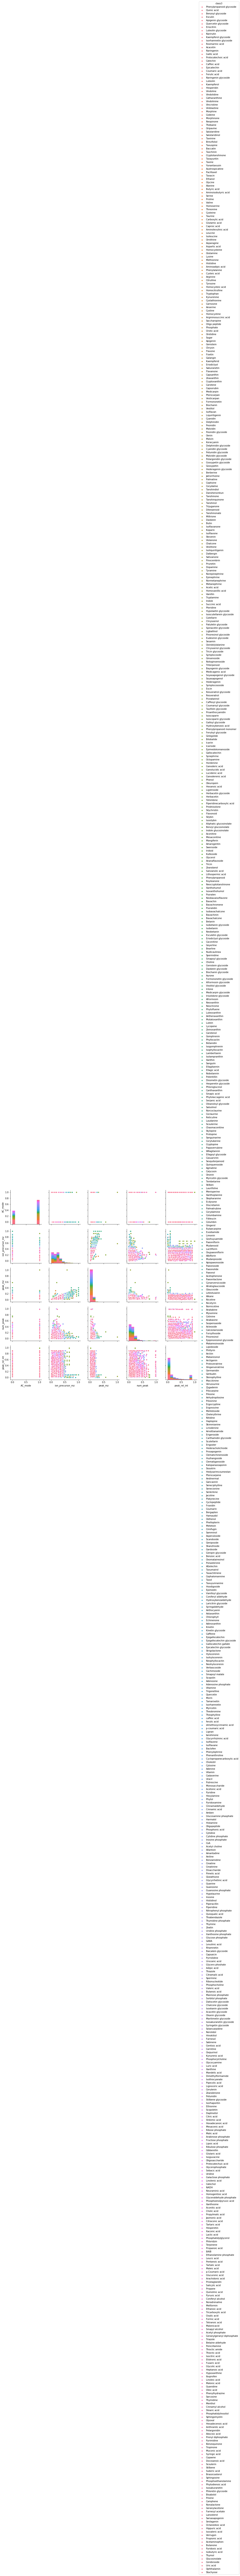

In [6]:
#When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. 
#This is very useful for exploring correlations between multidimensional data, 
#when you'd like to plot all pairs of values against each other.
sns.pairplot(features, hue='class3', size=2.5);

In [7]:
print("one possible correlation between peak_mz and ion_precursor_mz")

one possible correlation between peak_mz and ion_precursor_mz


In [3]:
train_df, test_df = train_test_split(features, test_size = .1)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40071 entries, 30854 to 19635
Data columns (total 9 columns):
ACCESSION           40071 non-null object
class1              40071 non-null object
class2              40071 non-null object
class3              40071 non-null object
AC_mode             40071 non-null int64
ion_precursor_mz    40071 non-null float64
peak_mz             40071 non-null float64
num_peak            40071 non-null float64
peak_rel_int        40071 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 32035 to 1534
Data columns (total 9 columns):
ACCESSION           4453 non-null object
class1              4453 non-null object
class2              4453 non-null object
class3              4453 non-null object
AC_mode             4453 non-null int64
ion_precursor_mz    4453 non-null float64
peak_mz             4453 non-null float64
num_peak            4453 non-null float64
peak_rel_int        4453 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.9+ KB


In [4]:
#target is class1
drop = ['class1', 'class2', 'class3', 'ACCESSION']

X_train = train_df.drop(drop, axis=1)
Y_train = train_df["class3"]
X_test  = test_df.drop(drop, axis=1).copy()

In [12]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

2.58 %


In [10]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.12 %


In [14]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

11.07 %


In [15]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

62.19 %


In [16]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

14.07 %


In [17]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

1.69 %


In [18]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

11.03 %


In [19]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.1 %


In [20]:
#wich is the best model?
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.10,Random Forest
99.10,Decision Tree
62.19,KNN
14.07,Naive Bayes
11.07,Logistic Regression
11.03,Support Vector Machines
2.58,Stochastic Gradient Decent
1.69,Perceptron


In [5]:
#As we can see, the Random Forest classifier goes on the first place. 
#But first, let us check, how random-forest performs, when we use cross validation

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [6]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [ 0.77364942  0.77562908  0.78493085  0.80224336  0.80946451  0.81132555
  0.83617571  0.83499214  0.82567101  0.83130246]
Mean: 0.80853840834
Standard Deviation: 0.0227622153945


In [8]:
print('Our model has a average accuracy of 81% with a standard deviation of 2%', '\n',
     'The standard deviation shows us, how precise the estimates are.', '\n',
     'This means in our case that the accuracy of our model can differ + - 2%.', '\n',
     'The accuracy is really good, we will try to increase it\'s performance even further in the following section.')

Our model has a average accuracy of 81% with a standard deviation of 2% 
 The standard deviation shows us, how precise the estimates are. 
 This means in our case that the accuracy of our model can differ + - 2%. 
 The accuracy is really good, we will try to increase it's performance even further in the following section.


In [11]:
#measure the relative importance of each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [12]:
importances.head(15)

,importance
feature,
ion_precursor_mz,0.453
peak_mz,0.222
num_peak,0.170
peak_rel_int,0.140
AC_mode,0.015


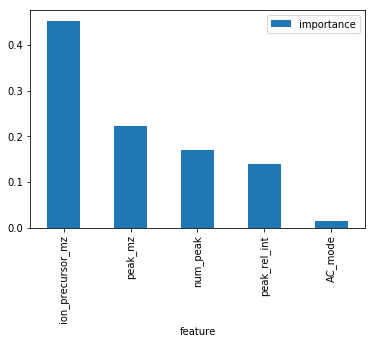

In [13]:
importances.plot.bar();

In [14]:
print('AC_mode doesn\'t play a significant role in our random forest classifiers prediction process.', '\n',
      'Because of that I will drop them from the dataset and train the classifier again')

AC_mode doesn't play a significant role in our random forest classifiers prediction process. 
 Because of that I will drop them from the dataset and train the classifier again


In [15]:
train_df  = train_df.drop("AC_mode", axis=1)
test_df  = test_df.drop("AC_mode", axis=1)

drop = ['class1', 'class2', 'class3', 'ACCESSION']

X_train = train_df.drop(drop, axis=1)
Y_train = train_df["class3"]
X_test  = test_df.drop(drop, axis=1).copy()

In [16]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.98 %


In [17]:
#this is another way to evaluate the classifier, which is probably much more accurate than the score from above
#Score of the training dataset obtained using an out-of-bag estimate
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.97 %


In [25]:
#hyper parameter tuning
param_grid = {"min_samples_split" : [2, 4, 10, 12]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


JoblibException: JoblibException
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
D:\anaconda2\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda2\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
D:\anaconda2\lib\runpy.py in _run_code(code=<code object <module> at 0x000002131EC8E930, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\anaconda2\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda2\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\anaconda2\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda2\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002131EC8E930, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\anaconda2\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda2\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\anaconda2\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
D:\anaconda2\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
D:\anaconda2\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
D:\anaconda2\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
D:\anaconda2\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(1068, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
D:\anaconda2\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(1068, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (1068, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
D:\anaconda2\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=1068, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
D:\anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
D:\anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
D:\anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
D:\anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
D:\anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 15, 22, 47, 2, 238980, tzinfo=tzutc()), 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'session': '9fedc8ccc7634d538cf959b9a0cba044', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9fedc8ccc7634d538cf959b9a0cba044']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 15, 22, 47, 2, 238980, tzinfo=tzutc()), 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'session': '9fedc8ccc7634d538cf959b9a0cba044', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9fedc8ccc7634d538cf959b9a0cba044'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 15, 22, 47, 2, 238980, tzinfo=tzutc()), 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'session': '9fedc8ccc7634d538cf959b9a0cba044', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e0f97e5ddd96468dae7386616efd2c29', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
D:\anaconda2\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
D:\anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
D:\anaconda2\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#hyper parameter tuning\nparam_grid = {"min_sampl...=-1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
D:\anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-25-936680d95f55>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2130b604400, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000213265D1DB0, file "<ipython-input-25-936680d95f55>", line 10>
        result = <ExecutionResult object at 2130b604400, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
D:\anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000213265D1DB0, file "<ipython-input-25-936680d95f55>", line 10>, result=<ExecutionResult object at 2130b604400, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000213265D1DB0, file "<ipython-input-25-936680d95f55>", line 10>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# data processing\nimport pandas as pd\n\n# linear ...om sklearn.model_selection import cross_val_score', "#import data\nfeatures = pd.read_csv('fulldata_co...s = features.drop('peak_int', 1)\nfeatures.head(5)", 'train_df, test_df = train_test_split(features, test_size = .1)', '#target is class1\ndrop = [\'class1\', \'class2\', \'c...ss3"]\nX_test  = test_df.drop(drop, axis=1).copy()', '#As we can see, the Random Forest classifier goe...f, X_train, Y_train, cv=10, scoring = "accuracy")', 'print("Scores:", scores)\nprint("Mean:", scores.mean())\nprint("Standard Deviation:", scores.std())', "print('Our model has a average accuracy of 80% w...formance even further in the following section.')", "print('Our model has a average accuracy of 81% w...formance even further in the following section.')", "#measure the relative importance of each feature...importance',ascending=False).set_index('feature')", '# Random Forest\nrandom_forest = RandomForestClas...* 100, 2)\nprint(round(acc_random_forest,2,), "%")', "#measure the relative importance of each feature...importance',ascending=False).set_index('feature')", 'importances.head(15)', 'importances.plot.bar();', r"print('AC_mode doesn\'t play a significant role ...from the dataset and train the classifier again')", 'train_df  = train_df.drop("AC_mode", axis=1)\ntes...ss3"]\nX_test  = test_df.drop(drop, axis=1).copy()', '# Random Forest\n\nrandom_forest = RandomForestCla...* 100, 2)\nprint(round(acc_random_forest,2,), "%")', '#this is another way to evaluate the classifier,...e:", round(random_forest.oob_score_, 4)*100, "%")', 'random_forest = RandomForestClassifier(criterion...e:", round(random_forest.oob_score_, 4)*100, "%")', "print('the score was ameliorated from 82% to 83% after hyperparameters tuning')", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:    ACCESSION           class1                   ... 0.089847  
10      0.053908  
11      0.013477  , 12:                   importance
feature            ..._int           0.140
AC_mode                0.015, 20: array([[17,  0,  0, ...,  0,  0,  0],
       [ 0...     [ 0,  0,  0, ...,  0,  0, 44]], dtype=int64), 24: 0.79501385041551242}, 'Perceptron': <class 'sklearn.linear_model.perceptron.Perceptron'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', '# data processing\nimport pandas as pd\n\n# linear ...om sklearn.model_selection import cross_val_score', "#import data\nfeatures = pd.read_csv('fulldata_co...s = features.drop('peak_int', 1)\nfeatures.head(5)", 'train_df, test_df = train_test_split(features, test_size = .1)', '#target is class1\ndrop = [\'class1\', \'class2\', \'c...ss3"]\nX_test  = test_df.drop(drop, axis=1).copy()', '#As we can see, the Random Forest classifier goe...f, X_train, Y_train, cv=10, scoring = "accuracy")', 'print("Scores:", scores)\nprint("Mean:", scores.mean())\nprint("Standard Deviation:", scores.std())', "print('Our model has a average accuracy of 80% w...formance even further in the following section.')", "print('Our model has a average accuracy of 81% w...formance even further in the following section.')", "#measure the relative importance of each feature...importance',ascending=False).set_index('feature')", '# Random Forest\nrandom_forest = RandomForestClas...* 100, 2)\nprint(round(acc_random_forest,2,), "%")', "#measure the relative importance of each feature...importance',ascending=False).set_index('feature')", 'importances.head(15)', 'importances.plot.bar();', r"print('AC_mode doesn\'t play a significant role ...from the dataset and train the classifier again')", 'train_df  = train_df.drop("AC_mode", axis=1)\ntes...ss3"]\nX_test  = test_df.drop(drop, axis=1).copy()', '# Random Forest\n\nrandom_forest = RandomForestCla...* 100, 2)\nprint(round(acc_random_forest,2,), "%")', '#this is another way to evaluate the classifier,...e:", round(random_forest.oob_score_, 4)*100, "%")', 'random_forest = RandomForestClassifier(criterion...e:", round(random_forest.oob_score_, 4)*100, "%")', "print('the score was ameliorated from 82% to 83% after hyperparameters tuning')", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:    ACCESSION           class1                   ... 0.089847  
10      0.053908  
11      0.013477  , 12:                   importance
feature            ..._int           0.140
AC_mode                0.015, 20: array([[17,  0,  0, ...,  0,  0,  0],
       [ 0...     [ 0,  0,  0, ...,  0,  0, 44]], dtype=int64), 24: 0.79501385041551242}, 'Perceptron': <class 'sklearn.linear_model.perceptron.Perceptron'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\daido\Desktop\ProjetDS\Classification-de-m-tabolite-secondaire-partir-de-spectres-de-masse\<ipython-input-25-936680d95f55> in <module>()
      5 
      6 rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
      7 
      8 clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
      9 
---> 10 clf.fit(X_train, Y_train)
     11 
     12 clf.best_params_

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=       ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], y=42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns]
        y = 42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
JoblibMemoryError                                  Sun Sep 16 00:59:49 2018
PID: 7300                             Python 3.6.5: D:\anaconda2\python.exe
...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False),        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], 42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, {'score': <function _passthrough_scorer>}, array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), array([    0,     1,     2, ..., 38753, 39195, 39606]), 0, {'min_samples_split': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False),        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], 42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, {'score': <function _passthrough_scorer>}, array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), array([    0,     1,     2, ..., 38753, 39195, 39606]), 0, {'min_samples_split': 2})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), X=       ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], y=42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), test=array([    0,     1,     2, ..., 38753, 39195, 39606]), verbose=0, parameters={'min_samples_split': 2}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...ue, random_state=1, verbose=0, warm_start=False)>
        X_train =        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[26450 rows x 4 columns]
        y_train = 2654                 Epinephrine
5663           ...sphate
Name: class3, Length: 26450, dtype: object
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), X=array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), y=array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 99
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in retrieve(self=Parallel(n_jobs=-1))
    735 %s""" % (this_report, exception.message)
    736                     # Convert this to a JoblibException
    737                     exception_type = _mk_exception(exception.etype)[0]
    738                     exception = exception_type(report)
    739 
--> 740                     raise exception
        exception = undefined
    741 
    742     def __call__(self, iterable):
    743         if self._jobs:
    744             raise ValueError('This Parallel instance is already running')

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\daido\Desktop\ProjetDS\Classification-de-m-tabolite-secondaire-partir-de-spectres-de-masse\<string> in <module>()

...........................................................................
D:\anaconda2\lib\multiprocessing\spawn.py in spawn_main(pipe_handle=3180, parent_pid=5832, tracker_fd=None)
    100         fd = msvcrt.open_osfhandle(new_handle, os.O_RDONLY)
    101     else:
    102         from . import semaphore_tracker
    103         semaphore_tracker._semaphore_tracker._fd = tracker_fd
    104         fd = pipe_handle
--> 105     exitcode = _main(fd)
        exitcode = undefined
        fd = 3
    106     sys.exit(exitcode)
    107 
    108 
    109 def _main(fd):

...........................................................................
D:\anaconda2\lib\multiprocessing\spawn.py in _main(fd=3)
    113             preparation_data = reduction.pickle.load(from_parent)
    114             prepare(preparation_data)
    115             self = reduction.pickle.load(from_parent)
    116         finally:
    117             del process.current_process()._inheriting
--> 118     return self._bootstrap()
        self._bootstrap = <bound method BaseProcess._bootstrap of <SpawnProcess(SpawnPoolWorker-4, started daemon)>>
    119 
    120 
    121 def _check_not_importing_main():
    122     if getattr(process.current_process(), '_inheriting', False):

...........................................................................
D:\anaconda2\lib\multiprocessing\process.py in _bootstrap(self=<SpawnProcess(SpawnPoolWorker-4, started daemon)>)
    253                 # delay finalization of the old process object until after
    254                 # _run_after_forkers() is executed
    255                 del old_process
    256             util.info('child process calling self.run()')
    257             try:
--> 258                 self.run()
        self.run = <bound method BaseProcess.run of <SpawnProcess(SpawnPoolWorker-4, started daemon)>>
    259                 exitcode = 0
    260             finally:
    261                 util._exit_function()
    262         except SystemExit as e:

...........................................................................
D:\anaconda2\lib\multiprocessing\process.py in run(self=<SpawnProcess(SpawnPoolWorker-4, started daemon)>)
     88     def run(self):
     89         '''
     90         Method to be run in sub-process; can be overridden in sub-class
     91         '''
     92         if self._target:
---> 93             self._target(*self._args, **self._kwargs)
        self._target = <function worker>
        self._args = (<sklearn.externals.joblib.pool.CustomizablePicklingQueue object>, <sklearn.externals.joblib.pool.CustomizablePicklingQueue object>, None, (), None, True)
        self._kwargs = {}
     94 
     95     def start(self):
     96         '''
     97         Start child process

...........................................................................
D:\anaconda2\lib\multiprocessing\pool.py in worker(inqueue=<sklearn.externals.joblib.pool.CustomizablePicklingQueue object>, outqueue=<sklearn.externals.joblib.pool.CustomizablePicklingQueue object>, initializer=None, initargs=(), maxtasks=None, wrap_exception=True)
    114             util.debug('worker got sentinel -- exiting')
    115             break
    116 
    117         job, i, func, args, kwds = task
    118         try:
--> 119             result = (True, func(*args, **kwds))
        result = undefined
        func = <sklearn.externals.joblib._parallel_backends.SafeFunction object>
        args = ()
        kwds = {}
    120         except Exception as e:
    121             if wrap_exception and func is not _helper_reraises_exception:
    122                 e = ExceptionWithTraceback(e, e.__traceback__)
    123             result = (False, e)

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __call__(self=<sklearn.externals.joblib._parallel_backends.SafeFunction object>, *args=(), **kwargs={})
    345     def __init__(self, func):
    346         self.func = func
    347 
    348     def __call__(self, *args, **kwargs):
    349         try:
--> 350             return self.func(*args, **kwargs)
        self.func = <sklearn.externals.joblib.parallel.BatchedCalls object>
        args = ()
        kwargs = {}
    351         except KeyboardInterrupt:
    352             # We capture the KeyboardInterrupt and reraise it as
    353             # something different, as multiprocessing does not
    354             # interrupt processing for a KeyboardInterrupt

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False),        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], 42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, {'score': <function _passthrough_scorer>}, array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), array([    0,     1,     2, ..., 38753, 39195, 39606]), 0, {'min_samples_split': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False),        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], 42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, {'score': <function _passthrough_scorer>}, array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), array([    0,     1,     2, ..., 38753, 39195, 39606]), 0, {'min_samples_split': 2})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), X=       ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[40071 rows x 4 columns], y=42375                    Farnesol
22790     Alip...sphate
Name: class3, Length: 40071, dtype: object, scorer={'score': <function _passthrough_scorer>}, train=array([ 1117,  2236,  2307, ..., 40068, 40069, 40070]), test=array([    0,     1,     2, ..., 38753, 39195, 39606]), verbose=0, parameters={'min_samples_split': 2}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...ue, random_state=1, verbose=0, warm_start=False)>
        X_train =        ion_precursor_mz   peak_mz  num_peak  pea... 0.052632      0.057502

[26450 rows x 4 columns]
        y_train = 2654                 Epinephrine
5663           ...sphate
Name: class3, Length: 26450, dtype: object
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), X=array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), y=array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 99
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Sun Sep 16 00:56:47 2018
PID: 7300                             Python 3.6.5: D:\anaconda2\python.exe
...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1300333575, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), array([[ 0.06752,  0.03878,  0.08772,  0.08985],...3,  0.01603,  0.05263,  0.0575 ]], dtype=float32), array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), None, 43, 100), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1300333575, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), None, 43, 100)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1300333575, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...rue, random_state=1, verbose=0, warm_start=False), X=array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), y=array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), sample_weight=None, tree_idx=43, n_trees=100, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1300333575, splitter='best')>
        X = array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32)
        y = array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]])
        sample_weight = None
        curr_sample_weight = array([ 2.,  1.,  0., ...,  0.,  0.,  1.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1300333575, splitter='best'), X=array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), y=array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), sample_weight=array([ 2.,  1.,  0., ...,  0.,  0.,  1.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1300333575, splitter='best'), X=array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32), y=array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]]), sample_weight=array([ 2.,  1.,  0., ...,  0.,  0.,  1.]), check_input=False, X_idx_sorted=None)
    357                                            max_depth,
    358                                            max_leaf_nodes,
    359                                            self.min_impurity_decrease,
    360                                            min_impurity_split)
    361 
--> 362         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[ 0.06751522,  0.03877816,  0.0877193 ,  ...0312 ,  0.05263158,  0.05750225]], dtype=float32)
        y = array([[ 190.],
       [ 318.],
       [ 318.],
...
       [ 627.],
       [ 118.],
       [ 252.]])
        sample_weight = array([ 2.,  1.,  0., ...,  0.,  0.,  1.])
        X_idx_sorted = None
    363 
    364         if self.n_outputs_ == 1:
    365             self.n_classes_ = self.n_classes_[0]
    366             self.classes_ = self.classes_[0]

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._add_node()

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._resize_c()

...........................................................................
D:\anaconda2\lib\site-packages\sklearn\tree\_utils.cp36-win_amd64.pyd in sklearn.tree._utils.safe_realloc()

MemoryError: could not allocate 94765056 bytes
___________________________________________________________________________
___________________________________________________________________________

In [ ]:
param_grid = {"criterion" : ["gini", "entropy"]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

In [ ]:
#très long!!!
param_grid = {"min_samples_leaf" : [1, 5, 10]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.best_params_

In [18]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, #min number of data points allowed in a leaf node
                                       min_samples_split = 2, #min number of data points placed in a node before the node is split  
                                       n_estimators=100, #number of trees in the foreset
                                       max_features='auto', #max number of features considered for splitting a node
                                       oob_score=True, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.01 %


In [19]:
print('the score was ameliorated from 82% to 83% after hyperparameters tuning')

the score was ameliorated from 82% to 83% after hyperparameters tuning


In [20]:
#further evaluation 
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

D:\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([[17,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 59, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  1,  2,  0],
       [ 0,  0,  0, ...,  0,  0, 44]], dtype=int64)

In [21]:
print('to big to be informative')

to big to be informative


In [22]:
#precision and recall

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions, average='micro'))
print("Recall:",recall_score(Y_train, predictions, average='micro'))

Precision: 0.795013850416
Recall: 0.795013850416


In [23]:
print('Our model predicts 79% of the time a class correctly (precision).', '\n' 
      'The recall tells us that it predicted the class of 79% of the molecules actually classed.')

Our model predicts 79% of the time a class correctly (precision). 
The recall tells us that it predicted the class of 79% of the molecules actually classed.


In [24]:
#You can combine precision and recall into one score, which is called the F-score. 
from sklearn.metrics import f1_score
f1_score(Y_train, predictions, average='micro')

0.79501385041551242